### **Import the necessary libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Reading the dataset**

In [59]:
df1 = pd.read_csv("Traveldata_train.csv")

In [60]:
data1 = df1.copy()

In [61]:
data1.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [62]:
data1.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


### **Checking the data types of the columns**

In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


### **Checking for missing values**

In [64]:
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Delay_in_Mins       357
Gender                       77
Departure_Delay_in_Mins      57
Age                          33
ID                            0
Travel_Class                  0
Travel_Distance               0
dtype: int64

In [65]:
share_missing_values = missing_values/data.isnull().count()
share_missing_values.sort_values(ascending=False)

Type_Travel                0.097755
Customer_Type              0.094841
Arrival_Delay_in_Mins      0.003783
Gender                     0.000816
Departure_Delay_in_Mins    0.000604
Age                        0.000350
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
dtype: float64

In [66]:
df2 =pd.read_csv("Surveydata_train.csv")

In [67]:
data2 =df2.copy()

In [68]:
data2.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [69]:
data2.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [70]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [71]:
missing_values2 = data2.isnull().sum()
missing_values2.sort_values(ascending=False)

Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Overall_Experience            0
Seat_Class                    0
ID                            0
dtype: int64

In [72]:
share_missing_values2 = missing_values2/data2.isnull().count()
share_missing_values2.sort_values(ascending=False)

Arrival_Time_Convenient    0.094619
Catering                   0.092616
Onboard_Service            0.080537
Baggage_Handling           0.001505
Online_Support             0.000964
Legroom                    0.000954
CheckIn_Service            0.000816
Ease_of_Online_Booking     0.000773
Seat_Comfort               0.000646
Platform_Location          0.000318
Onboard_Wifi_Service       0.000318
Onboard_Entertainment      0.000191
Cleanliness                0.000064
Online_Boarding            0.000064
Overall_Experience         0.000000
Seat_Class                 0.000000
ID                         0.000000
dtype: float64

# Joining two tables

In [73]:
df = data1.merge(data2, on='ID',how='left')

In [74]:
df.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Gender,Female,Male,Female,Female,Female
Customer_Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52.0,48.0,43.0,44.0,50.0
Type_Travel,NaN,Personal Travel,Business Travel,Business Travel,Business Travel
Travel_Class,Business,Eco,Business,Business,Business
Travel_Distance,272,2200,1061,780,1981
Departure_Delay_in_Mins,0.0,9.0,77.0,13.0,0.0
Arrival_Delay_in_Mins,5.0,0.0,119.0,18.0,0.0
Overall_Experience,0,0,1,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [76]:
share_missing_values = missing_values/df.isnull().count()
share_missing_values.sort_values(ascending=False)

Type_Travel                0.097755
Customer_Type              0.094841
Arrival_Delay_in_Mins      0.003783
Gender                     0.000816
Departure_Delay_in_Mins    0.000604
Age                        0.000350
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
Arrival_Time_Convenient         NaN
Baggage_Handling                NaN
Catering                        NaN
CheckIn_Service                 NaN
Cleanliness                     NaN
Ease_of_Online_Booking          NaN
Legroom                         NaN
Onboard_Entertainment           NaN
Onboard_Service                 NaN
Onboard_Wifi_Service            NaN
Online_Boarding                 NaN
Online_Support                  NaN
Overall_Experience              NaN
Platform_Location               NaN
Seat_Class                      NaN
Seat_Comfort                    NaN
dtype: float64

### **Converting the data types**

In [77]:
cols = df.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('Overall_Experience')

In [78]:
cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Overall_Experience']

In [79]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    df[i] = df[i].astype('category')

In [80]:
# Checking the info again and the datatype of different variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  category
 2   Customer_Type            85428 non-null  category
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  category
 5   Travel_Class             94379 non-null  category
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  category
 10  Seat_Comfort             94318 non-null  category
 11  Seat_Class               94379 non-null  category
 12  Arrival_Time_Convenient  85449 non-null  category
 13  Catering                 85638 non-null  category
 14  Platfo

# Descriptive Analysis

### **Analyzing Summary Statistics of the dataset**

In [107]:
df.drop(columns=['ID'],inplace=True)

In [108]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [109]:
# Analyzing the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


In [110]:
df.describe(include=['category']).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Overall_Experience,94379,2,1,51593
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173


In [111]:
# Checking the count of unique values in each categorical column 
cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i])
    print('Nbr of missing values',cols_cat[i].isnull().sum())    
    print(cols_cat[i].value_counts())    
    print('*'*40)

Unique values in Gender are :
0        Female
1          Male
2        Female
3        Female
4        Female
          ...  
94374      Male
94375      Male
94376      Male
94377      Male
94378      Male
Name: Gender, Length: 94379, dtype: category
Categories (2, object): ['Female', 'Male']
Nbr of missing values 77
Female    47815
Male      46487
Name: Gender, dtype: int64
****************************************
Unique values in Customer_Type are :
0        Loyal Customer
1        Loyal Customer
2        Loyal Customer
3        Loyal Customer
4        Loyal Customer
              ...      
94374    Loyal Customer
94375    Loyal Customer
94376               NaN
94377    Loyal Customer
94378    Loyal Customer
Name: Customer_Type, Length: 94379, dtype: category
Categories (2, object): ['Disloyal Customer', 'Loyal Customer']
Nbr of missing values 8951
Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
****************************************
Unique v

In [112]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots                                        
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize,                                        
                                           ) # creating the 2 subplots
    print(col)
    print('Skew :', round(cols_not_cat[col].skew(), 2))
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()

In [113]:
cols_not_cat = df.select_dtypes(exclude=['category'])

In [114]:
cols_not_cat.columns

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

Age
Skew : -0.0


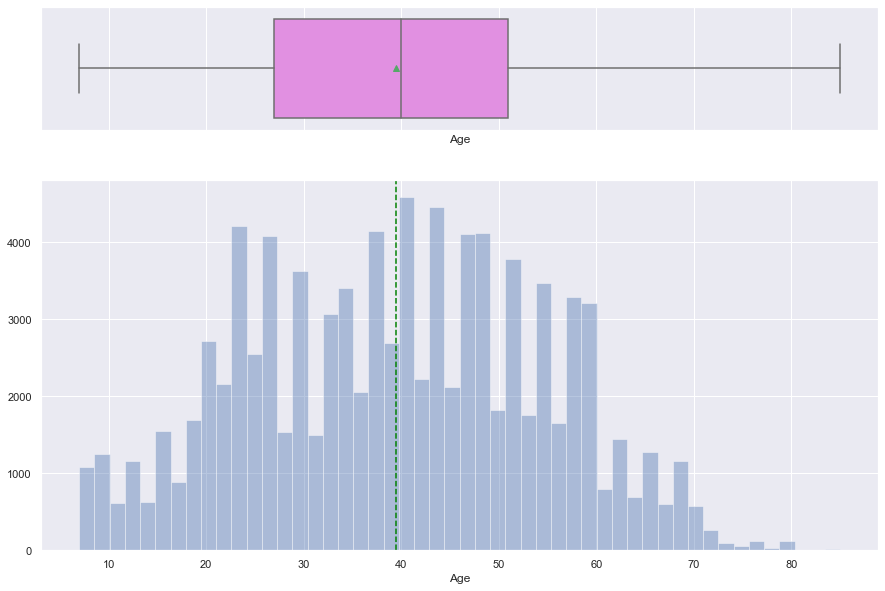

Travel_Distance
Skew : 0.47


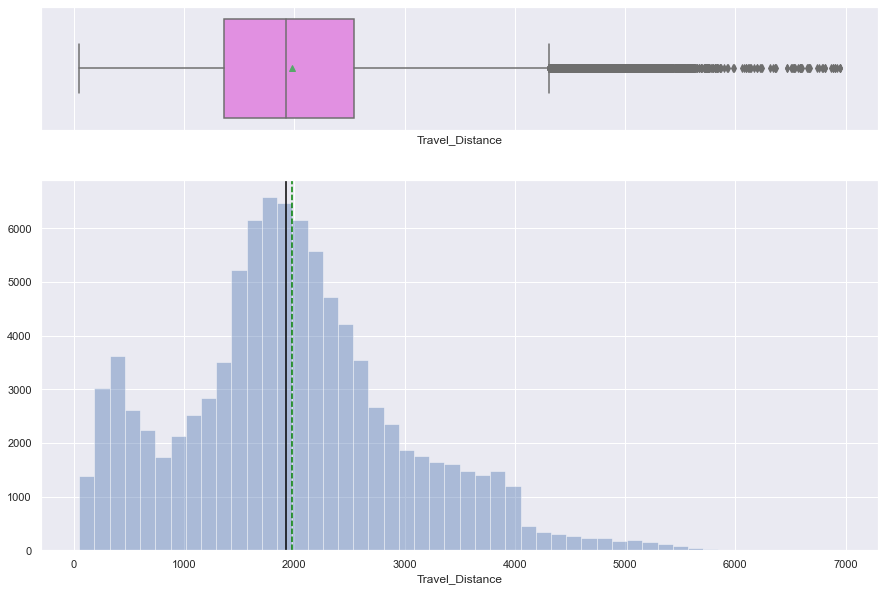

Departure_Delay_in_Mins
Skew : 7.16


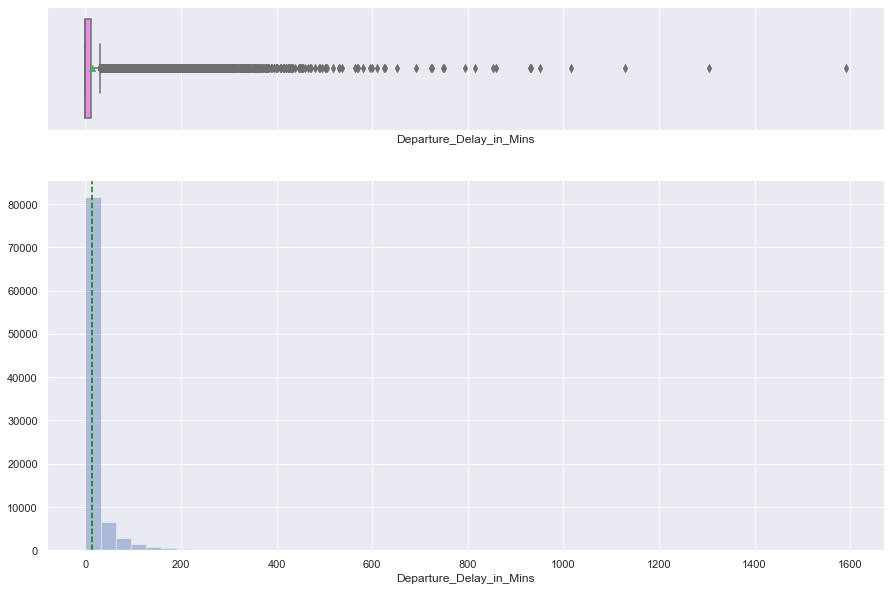

Arrival_Delay_in_Mins
Skew : 6.98


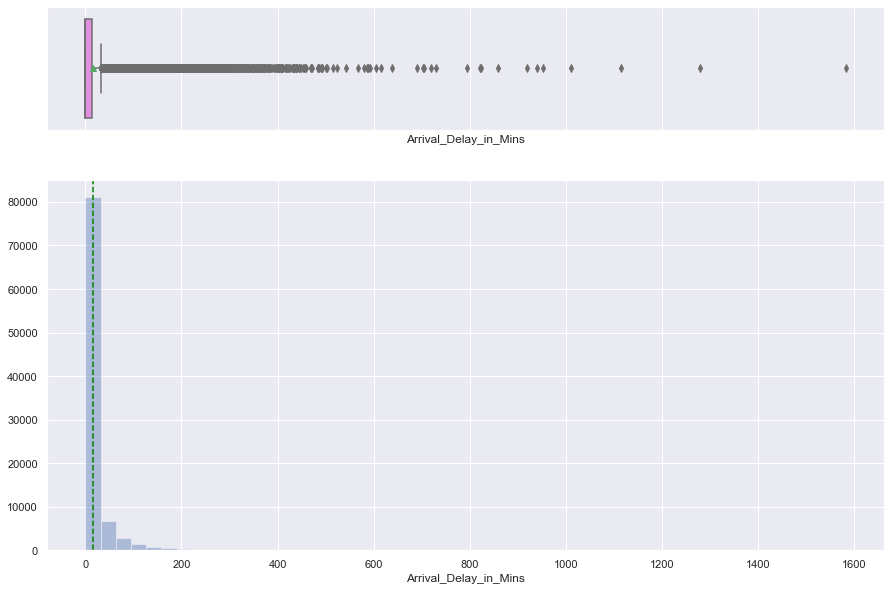

In [115]:
for col in cols_not_cat.columns:
    histogram_boxplot(cols_not_cat[col])

# Bivariate Analysis

In [116]:
independent_variables = df.loc[:,df.columns != 'Overall_Experience']

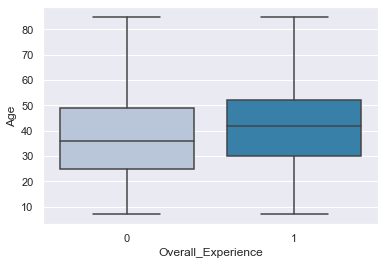

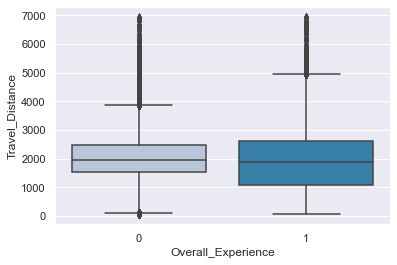

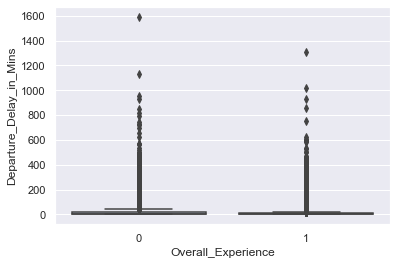

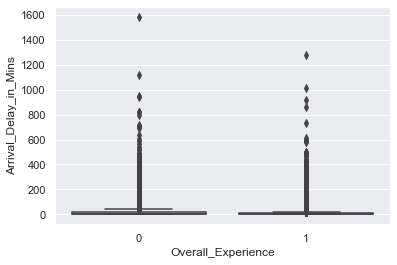

In [117]:
for col in cols_not_cat.columns:
    sns.boxplot(df["Overall_Experience"],cols_not_cat[col],palette="PuBu")
    plt.show()

In [130]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Overall_Experience'],margins=True)
    tab2 = pd.crosstab(x,df['Overall_Experience'],margins=True,normalize='index')
    print(tab1)
    print(tab2)    
    print('-'*120)
    tab = pd.crosstab(x,df['Overall_Experience'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Overall_Experience      0      1    All
Gender                                 
Female              16636  31179  47815
Male                26111  20376  46487
All                 42747  51555  94302
Overall_Experience         0         1
Gender                                
Female              0.347924  0.652076
Male                0.561684  0.438316
All                 0.453299  0.546701
------------------------------------------------------------------------------------------------------------------------


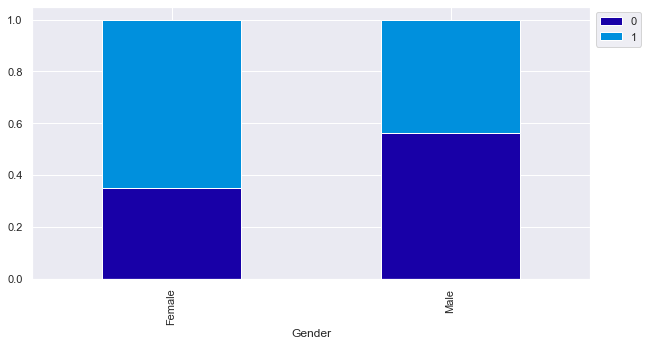

Overall_Experience      0      1    All
Customer_Type                          
Disloyal Customer   11869   3736  15605
Loyal Customer      26794  43029  69823
All                 38663  46765  85428
Overall_Experience         0         1
Customer_Type                         
Disloyal Customer   0.760590  0.239410
Loyal Customer      0.383742  0.616258
All                 0.452580  0.547420
------------------------------------------------------------------------------------------------------------------------


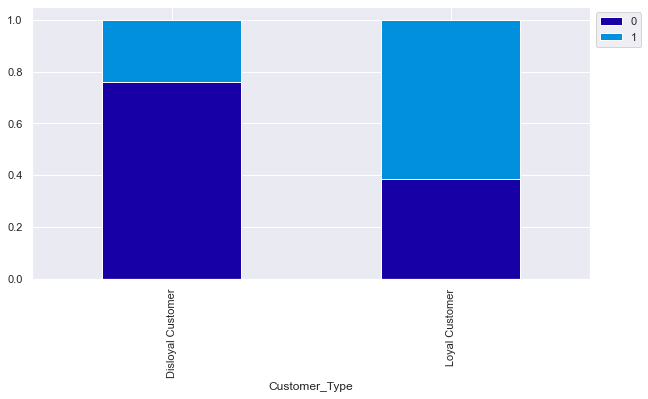

Overall_Experience      0      1    All
Age                                    
7.0                   280    225    505
8.0                   343    229    572
9.0                   381    259    640
10.0                  359    249    608
11.0                  343    268    611
...                   ...    ...    ...
78.0                   20     10     30
79.0                   32      7     39
80.0                   67     21     88
85.0                   12      6     18
All                 42770  51576  94346

[76 rows x 3 columns]
Overall_Experience         0         1
Age                                   
7.0                 0.554455  0.445545
8.0                 0.599650  0.400350
9.0                 0.595313  0.404687
10.0                0.590461  0.409539
11.0                0.561375  0.438625
...                      ...       ...
78.0                0.666667  0.333333
79.0                0.820513  0.179487
80.0                0.761364  0.238636
85.0                0.666667

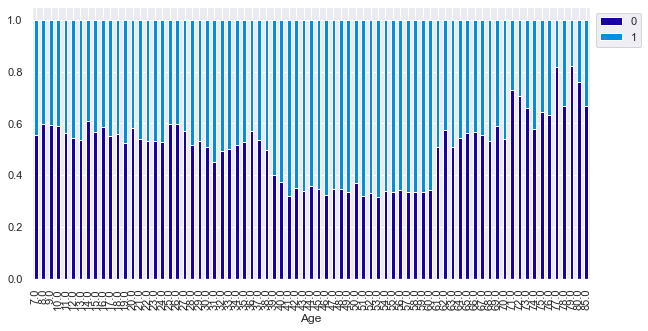

Overall_Experience      0      1    All
Type_Travel                            
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
All                 38600  46553  85153
Overall_Experience         0         1
Type_Travel                           
Business Travel     0.416961  0.583039
Personal Travel     0.533577  0.466423
All                 0.453302  0.546698
------------------------------------------------------------------------------------------------------------------------


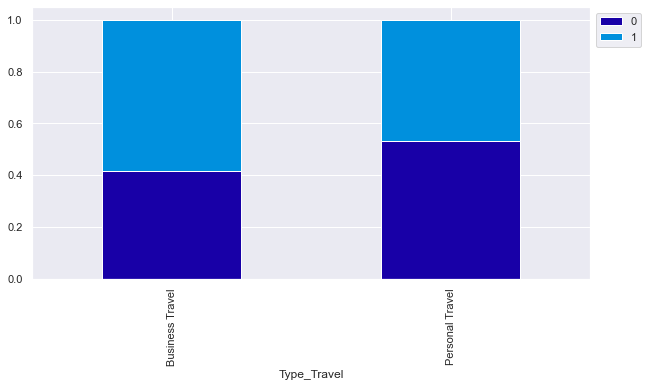

Overall_Experience      0      1    All
Travel_Class                           
Business            13142  31895  45037
Eco                 29644  19698  49342
All                 42786  51593  94379
Overall_Experience         0         1
Travel_Class                          
Business            0.291805  0.708195
Eco                 0.600786  0.399214
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


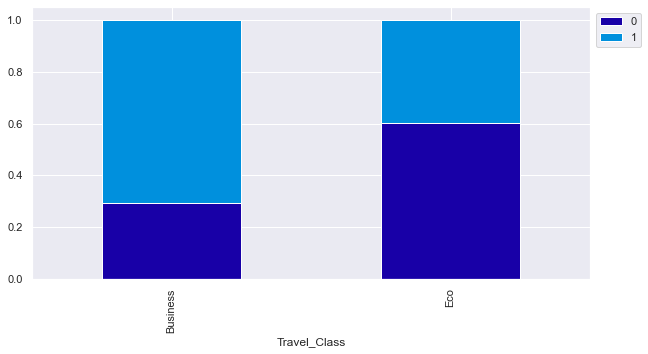

Overall_Experience      0      1    All
Travel_Distance                        
50                      2     11     13
51                      4     10     14
52                      2     16     18
53                      6     15     21
54                      4      9     13
...                   ...    ...    ...
6924                    1      0      1
6948                    0      1      1
6950                    0      1      1
6951                    1      0      1
All                 42786  51593  94379

[5211 rows x 3 columns]
Overall_Experience         0         1
Travel_Distance                       
50                  0.153846  0.846154
51                  0.285714  0.714286
52                  0.111111  0.888889
53                  0.285714  0.714286
54                  0.307692  0.692308
...                      ...       ...
6924                1.000000  0.000000
6948                0.000000  1.000000
6950                0.000000  1.000000
6951                1.0000

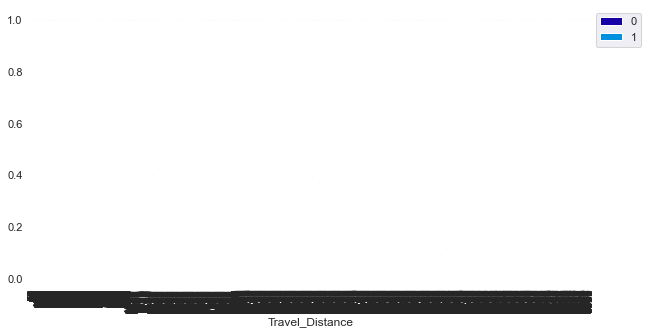

Overall_Experience           0      1    All
Departure_Delay_in_Mins                     
0.0                      22856  30483  53339
1.0                       1181   1553   2734
2.0                        881   1215   2096
3.0                        828   1010   1838
4.0                        752    889   1641
...                        ...    ...    ...
1017.0                       0      1      1
1128.0                       1      0      1
1305.0                       0      1      1
1592.0                       1      0      1
All                      42762  51560  94322

[438 rows x 3 columns]
Overall_Experience              0         1
Departure_Delay_in_Mins                    
0.0                      0.428504  0.571496
1.0                      0.431968  0.568032
2.0                      0.420324  0.579676
3.0                      0.450490  0.549510
4.0                      0.458257  0.541743
...                           ...       ...
1017.0                   0.000000  1.00

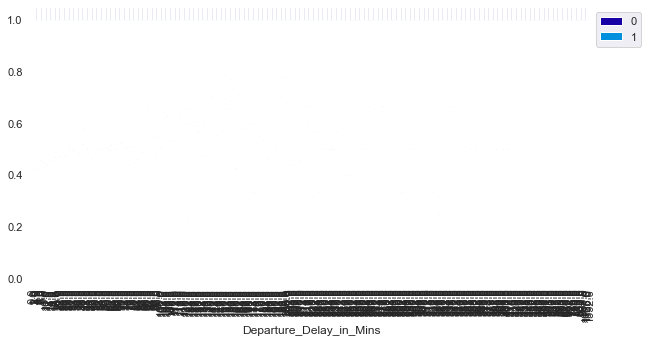

Overall_Experience         0      1    All
Arrival_Delay_in_Mins                     
0.0                    21903  31012  52915
1.0                      802   1193   1995
2.0                      798   1101   1899
3.0                      686   1071   1757
4.0                      725    988   1713
...                      ...    ...    ...
1011.0                     0      1      1
1115.0                     1      0      1
1280.0                     0      1      1
1584.0                     1      0      1
All                    42620  51402  94022

[435 rows x 3 columns]
Overall_Experience            0         1
Arrival_Delay_in_Mins                    
0.0                    0.413928  0.586072
1.0                    0.402005  0.597995
2.0                    0.420221  0.579779
3.0                    0.390438  0.609562
4.0                    0.423234  0.576766
...                         ...       ...
1011.0                 0.000000  1.000000
1115.0                 1.000000  0.0000

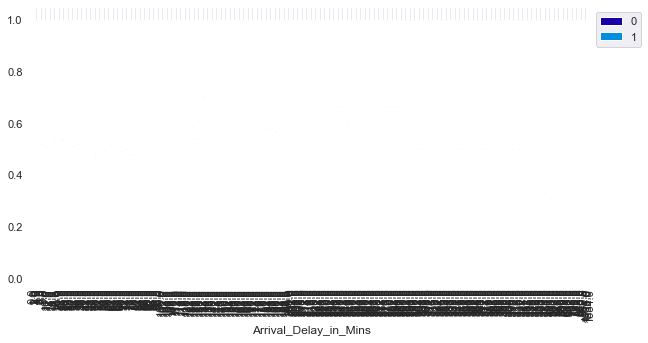

Overall_Experience      0      1    All
Seat_Comfort                           
Acceptable          13669   7489  21158
Excellent              96  12875  12971
Extremely Poor          8   3455   3463
Good                 7181  13414  20595
Needs Improvement   13464   7482  20946
Poor                 8339   6846  15185
All                 42757  51561  94318
Overall_Experience         0         1
Seat_Comfort                          
Acceptable          0.646044  0.353956
Excellent           0.007401  0.992599
Extremely Poor      0.002310  0.997690
Good                0.348677  0.651323
Needs Improvement   0.642796  0.357204
Poor                0.549160  0.450840
All                 0.453328  0.546672
------------------------------------------------------------------------------------------------------------------------


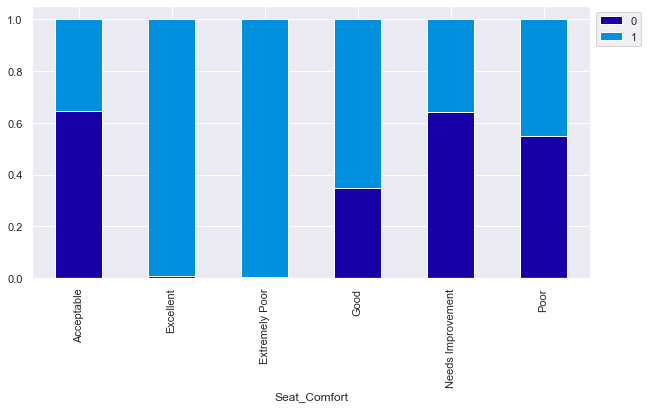

Overall_Experience      0      1    All
Seat_Class                             
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
All                 42786  51593  94379
Overall_Experience         0         1
Seat_Class                            
Green Car           0.451860  0.548140
Ordinary            0.454840  0.545160
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


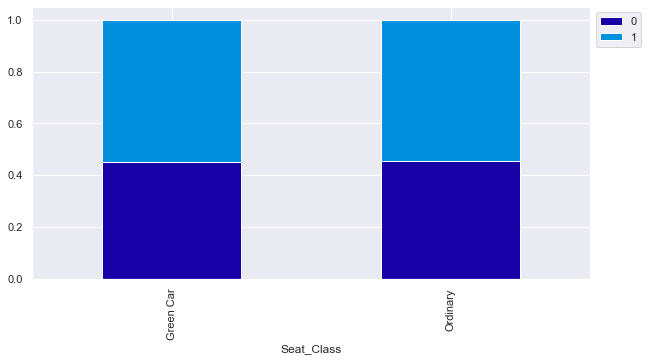

Overall_Experience           0      1    All
Arrival_Time_Convenient                     
Acceptable                7050   8127  15177
Excellent                 7866   9818  17684
Extremely Poor            1981   2351   4332
Good                      9307  10267  19574
Needs Improvement         6952   8038  14990
Poor                      5638   8054  13692
All                      38794  46655  85449
Overall_Experience              0         1
Arrival_Time_Convenient                    
Acceptable               0.464519  0.535481
Excellent                0.444809  0.555191
Extremely Poor           0.457295  0.542705
Good                     0.475478  0.524522
Needs Improvement        0.463776  0.536224
Poor                     0.411773  0.588227
All                      0.454002  0.545998
------------------------------------------------------------------------------------------------------------------------


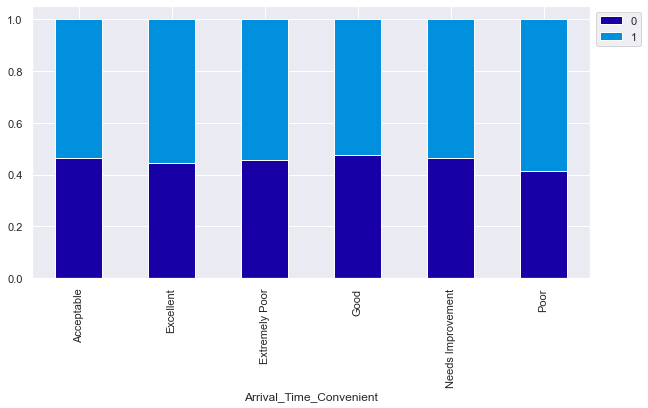

Overall_Experience      0      1    All
Catering                               
Acceptable          10574   7894  18468
Excellent            2945  10510  13455
Extremely Poor        879   3031   3910
Good                 7401  10568  17969
Needs Improvement   10226   7752  17978
Poor                 6814   7044  13858
All                 38839  46799  85638
Overall_Experience         0         1
Catering                              
Acceptable          0.572558  0.427442
Excellent           0.218878  0.781122
Extremely Poor      0.224808  0.775192
Good                0.411876  0.588124
Needs Improvement   0.568806  0.431194
Poor                0.491702  0.508298
All                 0.453525  0.546475
------------------------------------------------------------------------------------------------------------------------


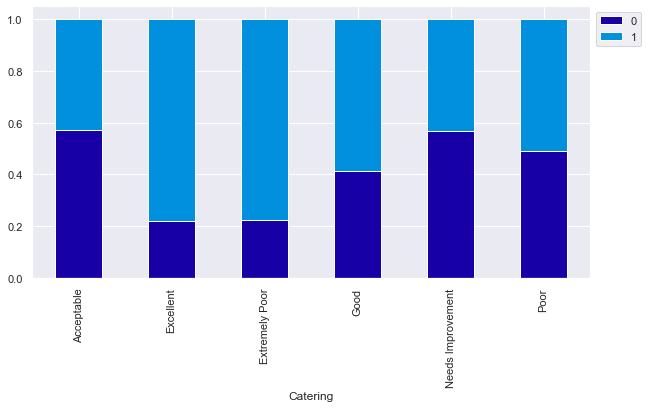

Overall_Experience      0      1    All
Platform_Location                      
Convenient          11009  10903  21912
Inconvenient         6422  10027  16449
Manageable          12985  11188  24173
Needs Improvement    7504  10328  17832
Very Convenient      4853   9128  13981
Very Inconvenient       0      2      2
All                 42773  51576  94349
Overall_Experience         0         1
Platform_Location                     
Convenient          0.502419  0.497581
Inconvenient        0.390419  0.609581
Manageable          0.537170  0.462830
Needs Improvement   0.420817  0.579183
Very Convenient     0.347114  0.652886
Very Inconvenient   0.000000  1.000000
All                 0.453349  0.546651
------------------------------------------------------------------------------------------------------------------------


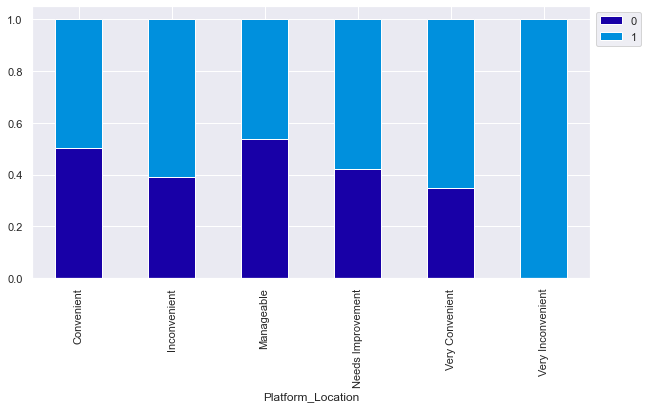

Overall_Experience        0      1    All
Onboard_Wifi_Service                     
Acceptable             9857  10261  20118
Excellent              6950  14018  20968
Extremely Poor           56     35     91
Good                   8235  14600  22835
Needs Improvement      9767   9829  19596
Poor                   7908   2833  10741
All                   42773  51576  94349
Overall_Experience           0         1
Onboard_Wifi_Service                    
Acceptable            0.489959  0.510041
Excellent             0.331457  0.668543
Extremely Poor        0.615385  0.384615
Good                  0.360631  0.639369
Needs Improvement     0.498418  0.501582
Poor                  0.736244  0.263756
All                   0.453349  0.546651
------------------------------------------------------------------------------------------------------------------------


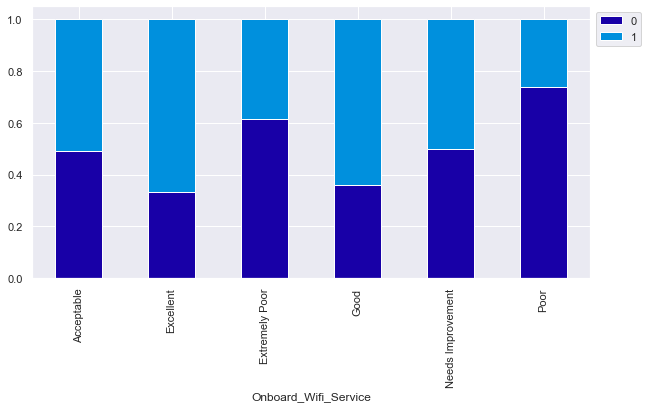

Overall_Experience         0      1    All
Onboard_Entertainment                     
Acceptable             14075   3485  17560
Excellent               1022  20622  21644
Extremely Poor           739   1405   2144
Good                    8548  21898  30446
Needs Improvement      11589   2337  13926
Poor                    6805   1836   8641
All                    42778  51583  94361
Overall_Experience            0         1
Onboard_Entertainment                    
Acceptable             0.801538  0.198462
Excellent              0.047219  0.952781
Extremely Poor         0.344683  0.655317
Good                   0.280759  0.719241
Needs Improvement      0.832184  0.167816
Poor                   0.787525  0.212475
All                    0.453344  0.546656
------------------------------------------------------------------------------------------------------------------------


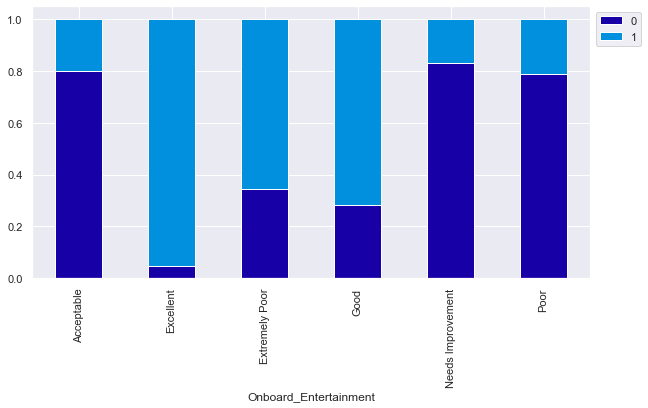

Overall_Experience      0      1    All
Online_Support                         
Acceptable          11300   4402  15702
Excellent            5877  20017  25894
Extremely Poor          1      0      1
Good                 9582  20434  30016
Needs Improvement    8790   3718  12508
Poor                 7205   2962  10167
All                 42755  51533  94288
Overall_Experience         0         1
Online_Support                        
Acceptable          0.719654  0.280346
Excellent           0.226964  0.773036
Extremely Poor      1.000000  0.000000
Good                0.319230  0.680770
Needs Improvement   0.702750  0.297250
Poor                0.708665  0.291335
All                 0.453451  0.546549
------------------------------------------------------------------------------------------------------------------------


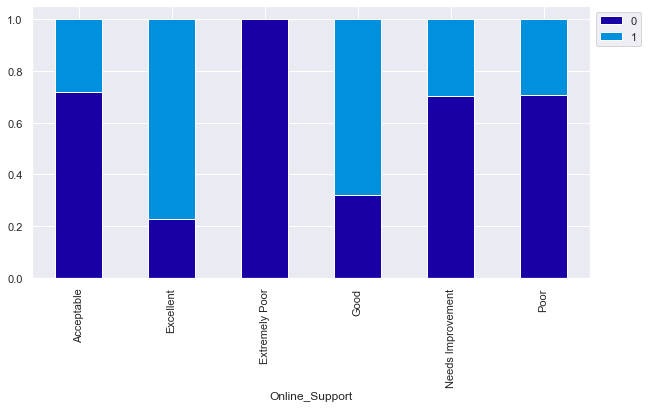

Overall_Experience          0      1    All
Ease_of_Online_Booking                     
Acceptable              10559   5831  16390
Excellent                5836  18908  24744
Extremely Poor             16      0     16
Good                     8115  20794  28909
Needs Improvement       10347   4132  14479
Poor                     7890   1878   9768
All                     42763  51543  94306
Overall_Experience             0         1
Ease_of_Online_Booking                    
Acceptable              0.644234  0.355766
Excellent               0.235855  0.764145
Extremely Poor          1.000000  0.000000
Good                    0.280708  0.719292
Needs Improvement       0.714621  0.285379
Poor                    0.807740  0.192260
All                     0.453449  0.546551
------------------------------------------------------------------------------------------------------------------------


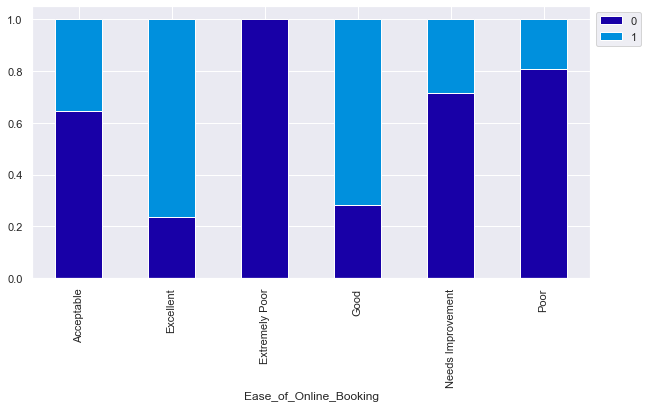

Overall_Experience      0      1    All
Onboard_Service                        
Acceptable          10708   7363  18071
Excellent            5032  16240  21272
Extremely Poor          4      0      4
Good                 9625  17640  27265
Needs Improvement    7547   3843  11390
Poor                 6425   2351   8776
All                 39341  47437  86778
Overall_Experience         0         1
Onboard_Service                       
Acceptable          0.592552  0.407448
Excellent           0.236555  0.763445
Extremely Poor      1.000000  0.000000
Good                0.353017  0.646983
Needs Improvement   0.662599  0.337401
Poor                0.732110  0.267890
All                 0.453352  0.546648
------------------------------------------------------------------------------------------------------------------------


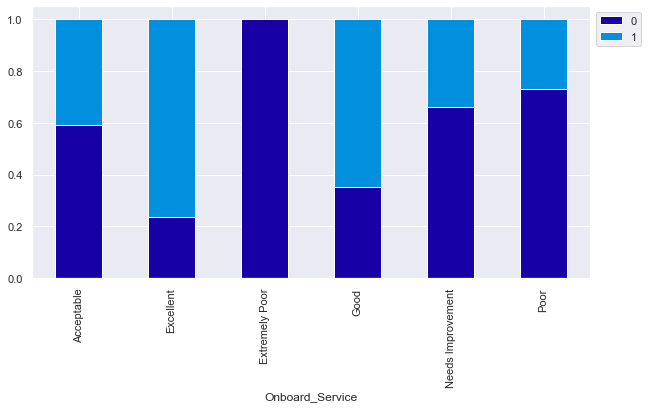

Overall_Experience      0      1    All
Legroom                                
Acceptable          10321   6063  16384
Excellent            7245  17587  24832
Extremely Poor        106    234    340
Good                 9488  19382  28870
Needs Improvement    9814   5939  15753
Poor                 5776   2334   8110
All                 42750  51539  94289
Overall_Experience         0         1
Legroom                               
Acceptable          0.629944  0.370056
Excellent           0.291761  0.708239
Extremely Poor      0.311765  0.688235
Good                0.328646  0.671354
Needs Improvement   0.622992  0.377008
Poor                0.712207  0.287793
All                 0.453393  0.546607
------------------------------------------------------------------------------------------------------------------------


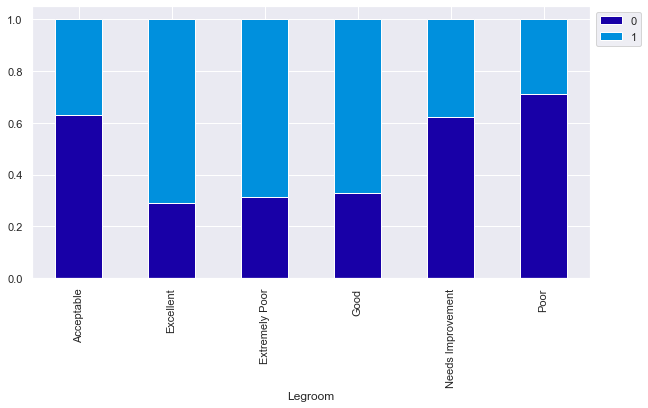

Overall_Experience      0      1    All
Baggage_Handling                       
Acceptable          12205   5562  17767
Excellent            6949  19054  26003
Good                14382  20562  34944
Needs Improvement    5875   3884   9759
Poor                 3311   2453   5764
All                 42722  51515  94237
Overall_Experience         0         1
Baggage_Handling                      
Acceptable          0.686948  0.313052
Excellent           0.267238  0.732762
Good                0.411573  0.588427
Needs Improvement   0.602008  0.397992
Poor                0.574427  0.425573
All                 0.453346  0.546654
------------------------------------------------------------------------------------------------------------------------


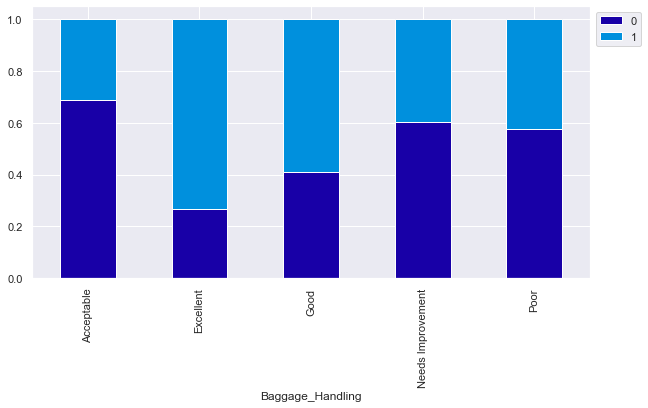

Overall_Experience      0      1    All
CheckIn_Service                        
Acceptable          11194  14609  25803
Excellent            5236  14405  19641
Extremely Poor          1      0      1
Good                11263  15239  26502
Needs Improvement    7484   3734  11218
Poor                 7574   3563  11137
All                 42752  51550  94302
Overall_Experience         0         1
CheckIn_Service                       
Acceptable          0.433826  0.566174
Excellent           0.266585  0.733415
Extremely Poor      1.000000  0.000000
Good                0.424987  0.575013
Needs Improvement   0.667142  0.332858
Poor                0.680075  0.319925
All                 0.453352  0.546648
------------------------------------------------------------------------------------------------------------------------


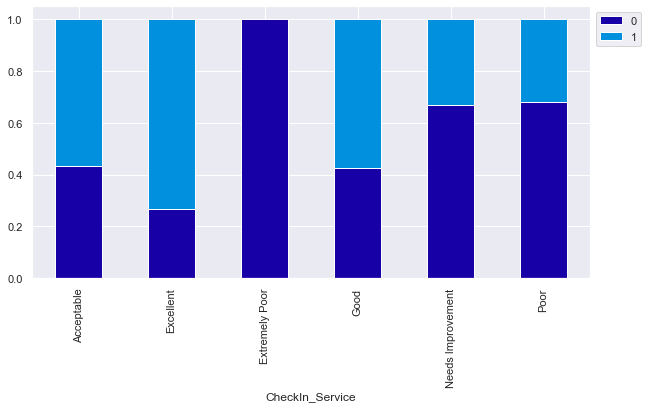

Overall_Experience      0      1    All
Cleanliness                            
Acceptable          11859   5590  17449
Excellent            7067  18986  26053
Extremely Poor          5      0      5
Good                14678  20749  35427
Needs Improvement    5849   3957   9806
Poor                 3328   2305   5633
All                 42786  51587  94373
Overall_Experience         0         1
Cleanliness                           
Acceptable          0.679638  0.320362
Excellent           0.271255  0.728745
Extremely Poor      1.000000  0.000000
Good                0.414317  0.585683
Needs Improvement   0.596472  0.403528
Poor                0.590804  0.409196
All                 0.453371  0.546629
------------------------------------------------------------------------------------------------------------------------


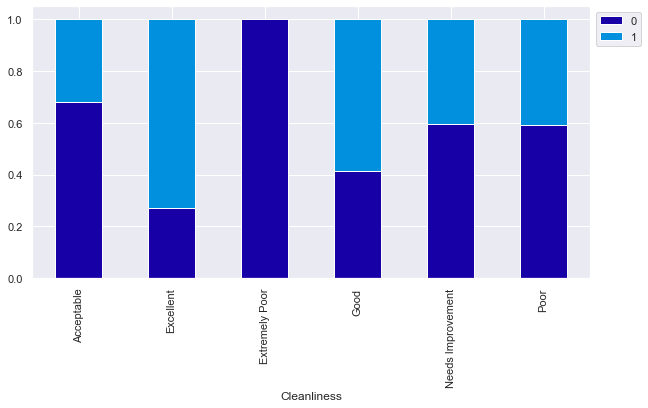

Overall_Experience      0      1    All
Online_Boarding                        
Acceptable          10125  12350  22475
Excellent            5857  15885  21742
Extremely Poor         12      0     12
Good                 8869  16664  25533
Needs Improvement    9674   3777  13451
Poor                 8249   2911  11160
All                 42786  51587  94373
Overall_Experience         0         1
Online_Boarding                       
Acceptable          0.450501  0.549499
Excellent           0.269386  0.730614
Extremely Poor      1.000000  0.000000
Good                0.347354  0.652646
Needs Improvement   0.719203  0.280797
Poor                0.739158  0.260842
All                 0.453371  0.546629
------------------------------------------------------------------------------------------------------------------------


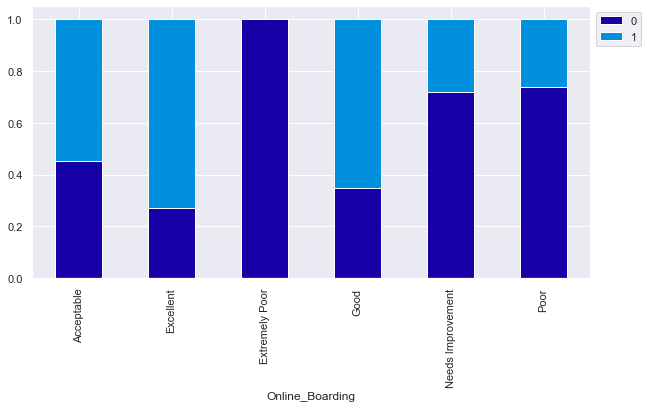

In [132]:
for col in independent_variables.columns:
    stacked_plot(independent_variables[col])
    plt.show()